<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# cd drive/My Drive/DONOR_CHOOSE_KNN/facebook

/content/drive/My Drive/DONOR_CHOOSE_KNN/facebook


In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [23]:
df_final_train.shape,df_final_test.shape

((100002, 54), (50002, 54))

In [24]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-4.900734e-18,1.096831e-18,-6.816555e-19,-2.226453e-18,6.710556e-19,-8.161336e-19,-2.606312e-18,6.392474e-19,-4.245830e-19,-1.315747e-18,3.849627e-19,-1.131971e-18,-1.510265e-18,1.454979e-19,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,-9.965436e-12,4.077137e-13,5.083778e-10,1.985267e-14,2.471968e-12,1.004354e-15,-2.629029e-13,1.428940e-11,9.146784e-11,8.590132e-12,2.406658e-10,7.638106e-15,-2.170899e-13,5.206150e-13,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,-3.408943e-13,1.125207e-13,3.190883e-07,8.550846e-14,1.405351e-13,7.172313e-15,-2.550169e-13,2.424636e-13,2.436301e-07,3.679960e-14,1.348520e-13,8.710393e-15,-4.795514e-13,1.521297e-13,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

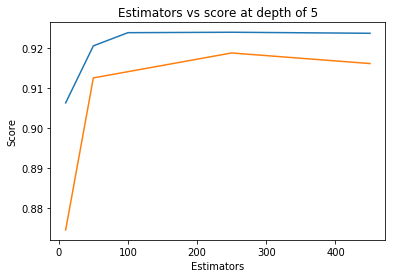

In [10]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


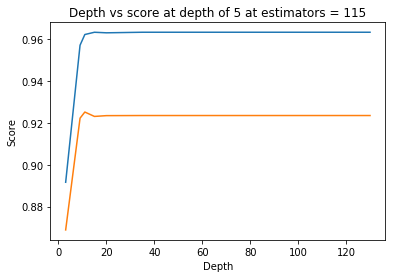

In [11]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [12]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',return_train_score=True,random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [13]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [16]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


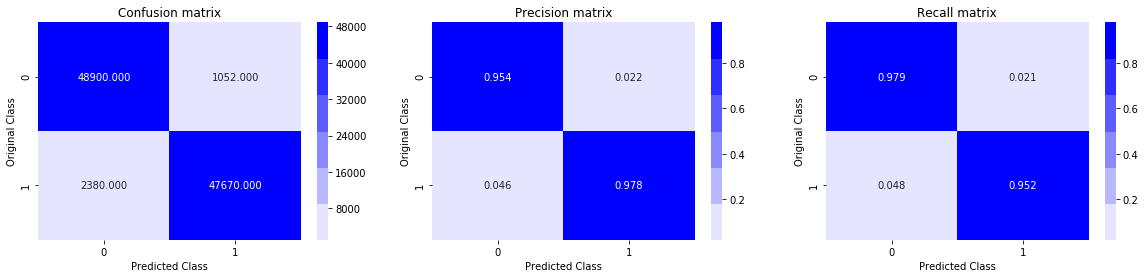

Test confusion_matrix


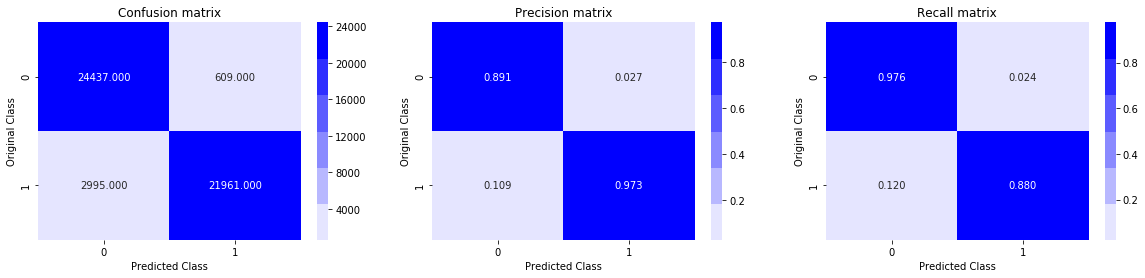

In [18]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

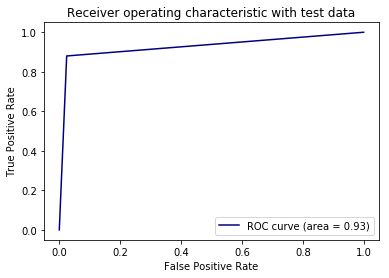

In [19]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

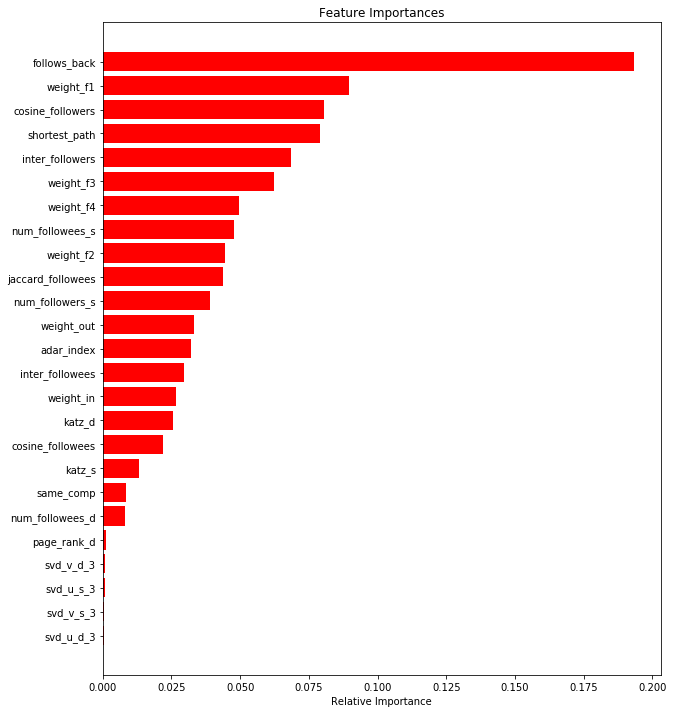

In [20]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

### Task-1 Add another feature called Preferential Attachment with followers and followees data of vertex. 

In [0]:
if os.path.isfile('../input/facebook-data/data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('../input/facebook-data/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [0]:
def prefrential_attachment_followee(a,b):
  try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        preattachfollowee = len(set(train_graph.successors(a)))* len(set(train_graph.successors(b)))
  except:
#       print("entred")
      return 0
  return preattachfollowee

In [0]:
def prefrential_attachment_follower(a,b):
  try:
      if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
          return 0
      preattachfollower  = len(set(train_graph.predecessors(a)))* len(set(train_graph.predecessors(b)))                       
      return preattachfollower
  except:
#       print("entred")
      return 0

In [0]:
#mapping  Preferential Attachment followers to train and test data
df_final_train['prefrential_attachment_follower'] = df_final_train.apply(lambda row:
                                        prefrential_attachment_follower(row['source_node'],row['destination_node']),axis=1)
df_final_test['prefrential_attachment_follower'] = df_final_test.apply(lambda row:
                                        prefrential_attachment_follower(row['source_node'],row['destination_node']),axis=1)

#mapping  Preferential Attachment followees to train and test data
df_final_train['prefrential_attachment_followee'] = df_final_train.apply(lambda row:
                                        prefrential_attachment_followee(row['source_node'],row['destination_node']),axis=1)
df_final_test['prefrential_attachment_followee'] = df_final_test.apply(lambda row:
                                        prefrential_attachment_followee(row['source_node'],row['destination_node']),axis=1)


# #mapping jaccrd followers to train and test data
# df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
#                                         cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
# df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
#                                         cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

# #mapping jaccrd followees to train and test data
# df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
#                                         cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
# df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
#                                         cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [0]:
df_final_train.head(10)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefrential_attachment_follower,prefrential_attachment_followee
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,66,120
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,1598,8662
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,980,902
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,22,35
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,33
5,1377733,375423,1,0,0.125000,0.148148,0.223607,9,10,8,...,4.053920e-13,8.468577e-16,-3.034187e-13,8.154763e-12,4.915173e-13,3.509642e-13,2.726584e-13,2.407333e-16,81,80
6,1691962,1039906,1,0,0.000000,0.000000,0.000000,5,1,4,...,2.273561e-17,5.257603e-20,-1.134555e-13,5.258108e-15,1.030865e-07,5.761211e-15,1.513797e-14,4.159309e-16,5,4
7,628080,812266,1,0,0.000000,0.117851,0.000000,3,7,7,...,2.567417e-10,8.853974e-14,-1.497446e-12,5.091851e-15,2.288960e-12,7.654502e-15,1.454794e-13,8.222904e-17,24,49
8,1725153,1822102,1,0,0.000000,0.000000,0.000000,13,9,9,...,3.368463e-14,4.071085e-17,-3.994068e-13,2.433104e-13,5.703881e-13,1.782188e-11,1.800730e-13,3.318246e-15,91,81
9,654494,1487831,1,0,0.111111,0.188982,0.218218,2,7,3,...,2.123603e-13,2.789305e-14,-5.228629e-15,2.701351e-15,1.020694e-07,5.219083e-15,4.038258e-14,2.350714e-16,14,21


### Task-2 Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features. 

In [0]:
df_final_train['svd_dot_u'] = 'null'
# df_final_train.shape[0]
from tqdm import tqdm
for i in tqdm(range(0,df_final_train.shape[0])):
    source_svd = df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']].iloc[i:i+1]
    destination_svd = df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']].iloc[i:i+1]
    svd_dot_train = np.dot(source_svd,destination_svd.T)
    df_final_train['svd_dot_u'].iloc[i:i+1] = svd_dot_train


100%|██████████| 100002/100002 [11:37<00:00, 143.44it/s]


In [0]:
df_final_train['svd_dot_v'] = 'null'
# df_final_train.shape[0]
from tqdm import tqdm
for i in tqdm(range(0,df_final_train.shape[0])):
    source_svd = df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']].iloc[i:i+1]
    destination_svd = df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']].iloc[i:i+1]
    svd_dot_train_v = np.dot(source_svd,destination_svd.T)
    df_final_train['svd_dot_v'].iloc[i:i+1] = svd_dot_train_v


100%|██████████| 100002/100002 [11:37<00:00, 143.43it/s]


In [0]:
df_final_test['svd_dot_u'] = 'null'
# df_final_train.shape[0]
from tqdm import tqdm
for i in tqdm(range(0,df_final_test.shape[0])):
    source_svd = df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']].iloc[i:i+1]
    destination_svd = df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']].iloc[i:i+1]
    svd_dot_test = np.dot(source_svd,destination_svd.T)
    df_final_test['svd_dot_u'].iloc[i:i+1] = svd_dot_test


100%|██████████| 50002/50002 [03:57<00:00, 210.24it/s]


In [0]:
df_final_test['svd_dot_v'] = 'null'
# df_final_train.shape[0]
from tqdm import tqdm
for i in tqdm(range(0,df_final_test.shape[0])):
    source_svd = df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']].iloc[i:i+1]
    destination_svd = df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']].iloc[i:i+1]
    svd_dot_test_v = np.dot(source_svd,destination_svd.T)
    df_final_test['svd_dot_v'].iloc[i:i+1] = svd_dot_test_v


100%|██████████| 50002/50002 [03:58<00:00, 209.56it/s]


In [0]:
df_final_train.head(10)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefrential_attachment_follower,prefrential_attachment_followee,svd_dot_u,svd_dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,66,120,1.11496e-11,2.23877e-12
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,1598,8662,0.00319281,0.000906872
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,980,902,1.7875e-35,2.46787e-36
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,22,35,4.71038e-20,3.15939e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,33,7.77395e-14,0
5,1377733,375423,1,0,0.125000,0.148148,0.223607,9,10,8,...,-3.034187e-13,8.154763e-12,4.915173e-13,3.509642e-13,2.726584e-13,2.407333e-16,81,80,2.63497e-23,1.10621e-22
6,1691962,1039906,1,0,0.000000,0.000000,0.000000,5,1,4,...,-1.134555e-13,5.258108e-15,1.030865e-07,5.761211e-15,1.513797e-14,4.159309e-16,5,4,-4.19785e-28,2.22872e-18
7,628080,812266,1,0,0.000000,0.117851,0.000000,3,7,7,...,-1.497446e-12,5.091851e-15,2.288960e-12,7.654502e-15,1.454794e-13,8.222904e-17,24,49,6.36816e-21,7.34162e-21
8,1725153,1822102,1,0,0.000000,0.000000,0.000000,13,9,9,...,-3.994068e-13,2.433104e-13,5.703881e-13,1.782188e-11,1.800730e-13,3.318246e-15,91,81,8.80894e-24,3.25862e-24
9,654494,1487831,1,0,0.111111,0.188982,0.218218,2,7,3,...,-5.228629e-15,2.701351e-15,1.020694e-07,5.219083e-15,4.038258e-14,2.350714e-16,14,21,5.42996e-13,7.84766e-13


### Task 3 Tune hyperparameters for XG boost with all these features and check the error metric.

### Splitting the data

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
df_final_train.head(10)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefrential_attachment_follower,prefrential_attachment_followee,svd_dot_u,svd_dot_v
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,66,120,1.11496e-11,2.23877e-12
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,1598,8662,0.00319281,0.000906872
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,980,902,1.7875e-35,2.46787e-36
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,22,35,4.71038e-20,3.15939e-18
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,33,7.77395e-14,0
5,0,0.125000,0.148148,0.223607,9,10,8,4,2,1.824340,...,-3.034187e-13,8.154763e-12,4.915173e-13,3.509642e-13,2.726584e-13,2.407333e-16,81,80,2.63497e-23,1.10621e-22
6,0,0.000000,0.000000,0.000000,5,1,4,0,0,0.000000,...,-1.134555e-13,5.258108e-15,1.030865e-07,5.761211e-15,1.513797e-14,4.159309e-16,5,4,-4.19785e-28,2.22872e-18
7,0,0.000000,0.117851,0.000000,3,7,7,1,0,0.000000,...,-1.497446e-12,5.091851e-15,2.288960e-12,7.654502e-15,1.454794e-13,8.222904e-17,24,49,6.36816e-21,7.34162e-21
8,0,0.000000,0.000000,0.000000,13,9,9,0,0,0.000000,...,-3.994068e-13,2.433104e-13,5.703881e-13,1.782188e-11,1.800730e-13,3.318246e-15,91,81,8.80894e-24,3.25862e-24
9,0,0.111111,0.188982,0.218218,2,7,3,1,1,0.897712,...,-5.228629e-15,2.701351e-15,1.020694e-07,5.219083e-15,4.038258e-14,2.350714e-16,14,21,5.42996e-13,7.84766e-13


In [0]:
df_final_train = df_final_train.astype(float)
df_final_test = df_final_test.astype(float)

In [0]:
# df_final_train

### Hyperarameter tunning 

Fitting 2 folds for each of 63 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 105.4min finished


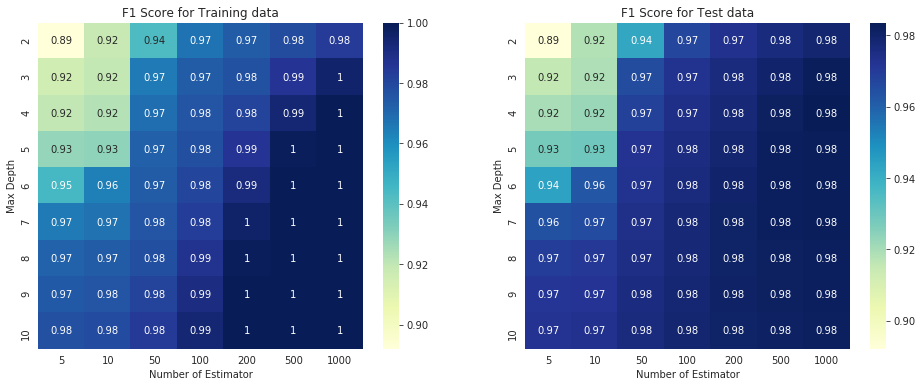

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.661970,0.012343,0.120193,0.016703,2,5,"{'max_depth': 2, 'n_estimators': 5}",0.919704,0.864564,0.892134,0.027570,63,0.917031,0.867032,0.892032,0.025000
1,1.874729,0.010904,0.112733,0.006491,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.919777,0.917186,0.918481,0.001295,61,0.916598,0.920652,0.918625,0.002027
2,7.536040,0.040642,0.145592,0.001685,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.944276,0.939973,0.942125,0.002151,55,0.944041,0.942574,0.943307,0.000734
3,14.585046,0.157704,0.216631,0.000395,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.968346,0.965330,0.966838,0.001508,49,0.967399,0.967514,0.967457,0.000057
4,28.407301,0.195649,0.338354,0.010053,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.973941,0.972431,0.973186,0.000755,39,0.973173,0.974495,0.973834,0.000661


In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg_clf = XGBClassifier()
parameters = {'n_estimators':[5, 10, 50, 100, 200, 500, 1000],'max_depth':[2,3, 4, 5, 6, 7, 8, 9, 10]}
xgclf = GridSearchCV(xg_clf, parameters, n_jobs= -1, verbose=10, cv=2, scoring='f1',return_train_score=True)
xgclf.fit(df_final_train, y_train)

results = pd.DataFrame.from_dict(xgclf.cv_results_)
# results4 = results4.sort_values(['param_alpha'])
max_depth_list = list(xgclf.cv_results_['param_max_depth'].data)
n_estimator_list = list(xgclf.cv_results_['param_n_estimators'].data)


sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

data = pd.DataFrame(data={'Number of Estimator':n_estimator_list, 'Max Depth':max_depth_list, 'F1 Score':xgclf.cv_results_['mean_train_score']})
data = data.reset_index().pivot_table(index='Max Depth', columns='Number of Estimator', values='F1 Score')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('F1 Score for Training data')
plt.subplot(1,2,2)

# Testing Heatmap
data = pd.DataFrame(data={'Number of Estimator':n_estimator_list, 'Max Depth':max_depth_list, 'F1 Score':xgclf.cv_results_['mean_test_score']})
data = data.reset_index().pivot_table(index='Max Depth', columns='Number of Estimator', values='F1 Score')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('F1 Score for Test data')
plt.show()

results.head()



In [0]:
# from sklearn.metrics import f1_score
n_estimators = 500
max_depth = 2


xg_clf = XGBClassifier(max_depth = max_depth, n_estimators = n_estimators , n_jobs=1)
xg_clf.fit(df_final_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

xg_clf.fit(df_final_train,y_train)
y_train_pred = xg_clf.predict(df_final_train)
y_test_pred = xg_clf.predict(df_final_test)

Train confusion_matrix


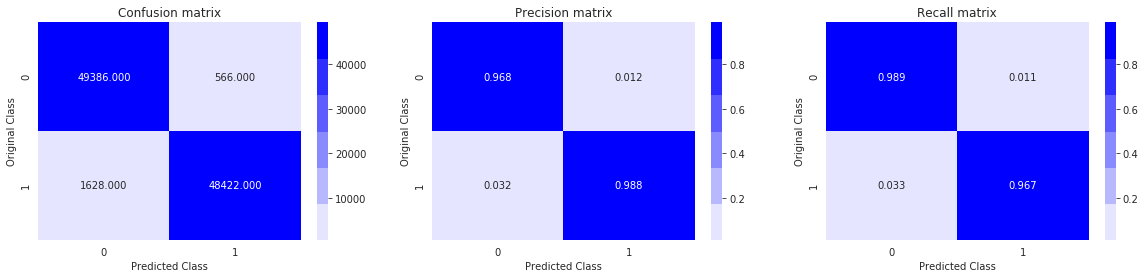

Test confusion_matrix


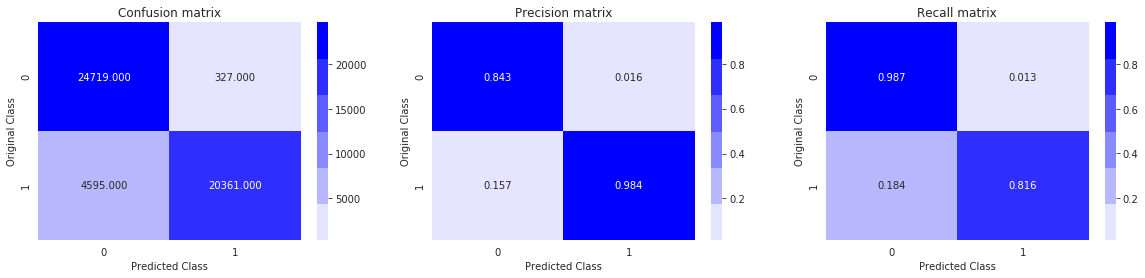

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

### Conclusion

### Step by Step step by step procedure I followed to solve this case study.

<ol><li>First I identify which type of machine learning problem this case study is.</li>
  <li>Then I found the business constraints</li>
<li>Then I did the exploratory data analysis such as : Number of followees and follower, Number of people each person is following</li>
  <li>Then I split the data into train and split</li>
  <li>Then I created the other class 0 </li>
  <li>After that I created some features such as  Jaccard Distance, Cosine Distance, page rank and many more</li>
  <li>Then I did the hyperparameter tunning and trained Random Forest and XGboost</li>
</ol>

### Comparision tables

In [28]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","F1 Score(test)","Precission class 1(test)", "Precission class 0(test)", "Recall class 1(test)", "Recall class 0(test)"]
x.add_row(["Random Forest",0.92,97.3,89.1,97.6,88.0])
x.add_row(["XGBoost",0.98,98.4,84.3,81.6,98.7])
print(x)

+---------------+----------------+--------------------------+--------------------------+----------------------+----------------------+
|     Model     | F1 Score(test) | Precission class 1(test) | Precission class 0(test) | Recall class 1(test) | Recall class 0(test) |
+---------------+----------------+--------------------------+--------------------------+----------------------+----------------------+
| Random Forest |      0.92      |           97.3           |           89.1           |         97.6         |         88.0         |
|    XGBoost    |      0.98      |           98.4           |           84.3           |         81.6         |         98.7         |
+---------------+----------------+--------------------------+--------------------------+----------------------+----------------------+
